In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Test_set.xlsx')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train.dropna(inplace=True)

In [7]:
train.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


In [8]:
train['Journey_date'] = pd.to_datetime(train['Date_of_Journey'], format='%d/%m/%Y').dt.day

In [9]:
train['Journey_month'] = pd.to_datetime(train['Date_of_Journey'],format='%d/%m/%Y').dt.month

In [10]:
train = train.drop('Date_of_Journey',1)

In [11]:
train['hrs'] = pd.to_datetime(train['Dep_Time']).dt.hour

In [12]:
train['min'] = pd.to_datetime(train['Dep_Time']).dt.minute

In [13]:
train = train.drop('Dep_Time',1)

In [14]:
train.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,hrs,min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [15]:
duration = list(train["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [16]:
train['duration_hrs'] = duration_hours
train['duration_min'] = duration_mins

In [17]:
train['duration_min'].value_counts()

30    1446
0     1031
20     997
50     972
35     939
55     910
15     903
45     896
25     803
40     636
5      624
10     525
Name: duration_min, dtype: int64

In [18]:
train = train.drop('Duration',1)

In [19]:
train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

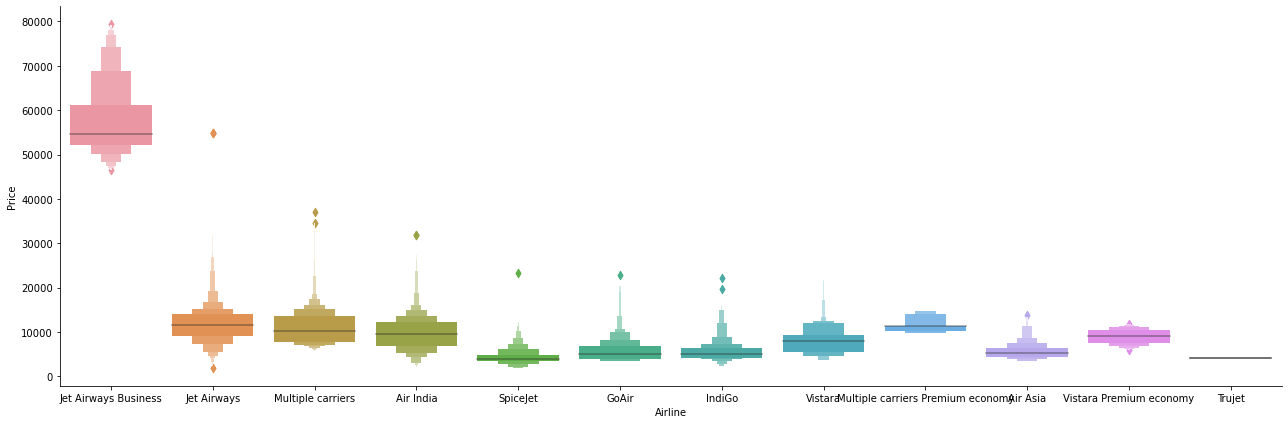

In [20]:
sns.catplot(y='Price',x='Airline',data=train.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)

In [21]:
Airline = train['Airline']

Airline = pd.get_dummies(Airline,drop_first=True)

In [22]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


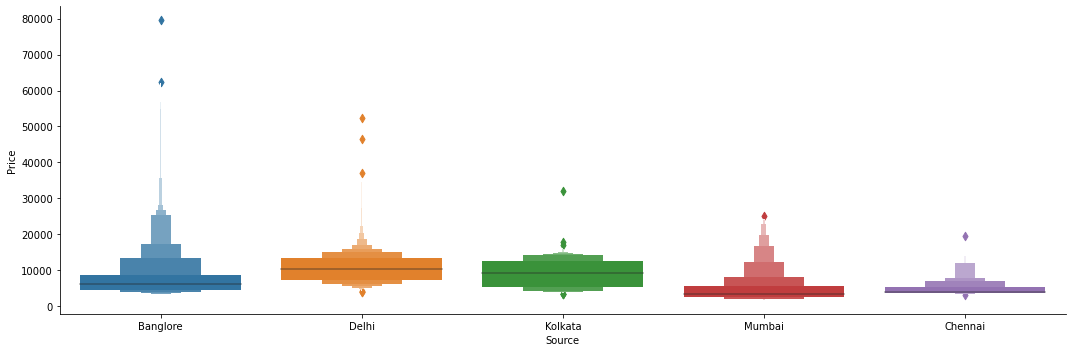

In [23]:
sns.catplot(y='Price',x='Source',data=train.sort_values('Price',ascending=False),kind='boxen',aspect=3)
plt.show()

In [24]:
Source = train['Source']
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [25]:
Destination = train['Destination']
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [26]:
train = train.drop(['Route','Additional_Info'],1)

In [27]:
train['Arrival_hours'] = pd.to_datetime(train['Arrival_Time']).dt.hour
train['Arrival_min'] = pd.to_datetime(train['Arrival_Time']).dt.minute

train = train.drop('Arrival_Time',1)

In [28]:
train.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,hrs,min,duration_hrs,duration_min,Arrival_hours,Arrival_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,2,50,1,10
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,7,25,13,15


In [29]:
train['Total_Stops'] = train['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [30]:
train = train.drop(['Airline','Destination','Source'],1)

In [31]:
train_df = pd.concat([train,Airline,Source,Destination],1)

In [32]:
train_df.head()

,Total_Stops,Price,Journey_date,Journey_month,hrs,min,duration_hrs,duration_min,Arrival_hours,Arrival_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,2,50,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,7,25,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,19,0,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,5,25,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,4,45,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [33]:
train_df.shape

(10682, 30)

In [34]:
X = train.drop('Price',1)
y = train['Price']

In [35]:
from sklearn.model_selection import train_test_split
x_train, y_train, x_test, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

In [36]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X,y)

ExtraTreesRegressor()

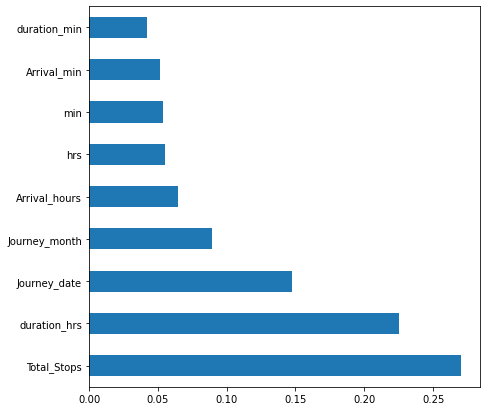

In [37]:
plt.figure(figsize=(7,7))
imp_feature = pd.Series(etr.feature_importances_,index=X.columns)
imp_feature.nlargest(15).plot(kind='barh')
plt.show()

In [38]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,x_test)
y_pred = rfr.predict(y_train)

In [39]:
from sklearn import metrics
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7383813732762134

In [40]:
rfr.score(x_train,x_test)

0.941131696474996

In [41]:
rfr.score(y_train,y_test)

0.7383813732762134

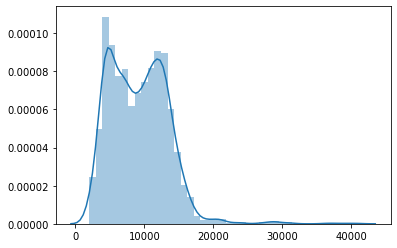

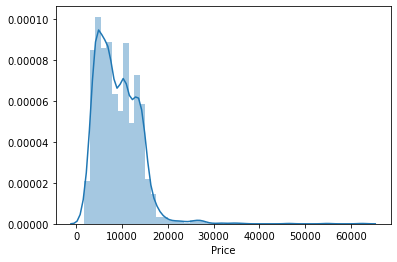

In [42]:
sns.distplot(y_pred)
plt.show()
sns.distplot(y_test)
plt.show()

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [45]:
min_samples_split

[2, 5, 10, 15, 100]

In [46]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [47]:
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [48]:
rf_random.fit(x_train,x_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   8.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [49]:
prediction = rf_random.predict(y_train)

In [50]:
r2_score(y_test,prediction)

0.761657058081154

In [52]:
import pickle

In [53]:
file = open('fligth_rfr.pkl','wb')
pickle.dump(rfr,file)

In [54]:
model = open('fligth_rfr.pkl','rb')
rfr_mdel = pickle.load(model)

In [55]:
y_pred2 = rfr_mdel.predict(y_train)

In [56]:
y_pred2

array([ 4358.85  ,  2009.812 , 13124.014 , ...,  4260.365 , 10383.26  ,
       11717.9425])

In [57]:
r2_score(y_test,y_pred2)

0.7383813732762134

In [ ]:
# test.head(2)

In [ ]:
# train_df.head(1)

In [ ]:
# test['Journey_date'] = pd.to_datetime(test['Date_of_Journey'],format= '%d/%m/%Y').dt.day
# test['Journey_month'] = pd.to_datetime(test['Date_of_Journey'], format= '%d/%m/%Y').dt.month
# test = test.drop('Date_of_Journey',1)

In [58]:
train.columns

Index(['Total_Stops', 'Price', 'Journey_date', 'Journey_month', 'hrs', 'min',
       'duration_hrs', 'duration_min', 'Arrival_hours', 'Arrival_min'],
      dtype='object')